### **IMAGE**  **PREPROCESSING** 

### **1. IMAGE ENHANCEMENT - INCREASING CONTRAST**

In [0]:
from PIL import Image, ImageEnhance

#read the image

def image_enhancement(dest,file,f):

  im = Image.open(file)
  newsize = (256, 256) 
  im1 = im.resize(newsize)

  #image brightness enhancer
  enhancer = ImageEnhance.Contrast(im1)

  factor = 2 #increase contrast
  im_output = enhancer.enhance(factor)
  file_path = os.path.join(dest,f)
  im_output.save(file_path)
  

In [0]:
import os
def create_enhanced_image(root,dest):
  for roots, dirs, files in os.walk(root):
    for dir in dirs:
      print(dir)
      mypath = dest + '/' + dir
      # print(mypath)
      if not os.path.isdir(mypath):
        os.makedirs(mypath)
      path = os.path.join(roots,dir)
      print(path)
      for r,d,f in os.walk(path):
        for eachFile in f:
          print(eachFile)
          print(os.path.join(path,eachFile))
          image_enhancement(mypath, os.path.join(path,eachFile),eachFile)


In [0]:
root = '/content/data/data/Dataset'
dest = '/content/data/EnhancedImage_Dataset'
create_enhanced_image(root,dest)

### **2. IMAGE SEGMENTATION - RIB SUPPRESSION**

In [0]:
def build_filters():
 filters = []
 ksize = 31
 for theta in np.arange(0, np.pi, np.pi / 16):
  kern = cv2.getGaborKernel((ksize, ksize), 0.7, theta, 15.0, 0.2, 1, ktype=cv2.CV_32F)
  kern /= 1.5*kern.sum()
  filters.append(kern)
 return filters

In [0]:
def process(img, filters):
 accum = np.zeros_like(img)
 for kern in filters:
  fimg = cv2.filter2D(np.array(img), cv2.CV_8UC3, kern)
  np.maximum(accum, fimg, accum)
 return accum

In [0]:
 from PIL import Image
 def rib_suppression(dest,file,f):
  im = Image.open(file)
  newsize = (256, 256) 
  im1 = im.resize(newsize)
  if im1 is None:
    print('Failed to load image file:', im1)
    sys.exit(1)
 
  filters = build_filters()
  res1 = process(im1, filters)
  file_path = os.path.join(dest,f)
  img = Image.fromarray(res1)
  if img.mode in ("RGBA", "P"):
    img = img.convert("RGB")
  img.save(file_path)

In [0]:
import os
def create_suppressed_image(root,dest):
  for roots, dirs, files in os.walk(root):
    for dir in dirs:
      print(dir)
      mypath = dest + '/' + dir
      # print(mypath)
      if not os.path.isdir(mypath):
        os.makedirs(mypath)
      path = os.path.join(roots,dir)
      print(path)
      for r,d,f in os.walk(path):
        for eachFile in f:
          print(eachFile)
          print(os.path.join(path,eachFile))
          rib_suppression(mypath, os.path.join(path,eachFile),eachFile)

In [0]:
root = '/content/Data/content/data1/EnhancedImage_Dataset'
dest = '/content/SuppressedImages_Dataset'
create_suppressed_image(root,dest)

### **3. DATA AUGMENTATION**

In [0]:
def count_file(root):

  path, dirs, files = next(os.walk(root))
  file_count = len(files)
  return file_count

In [0]:
import numpy as np
from skimage.transform import rotate
from keras.preprocessing.image import ImageDataGenerator, img_to_array
import cv2
import matplotlib.pyplot as plt
% matplotlib inline

def random_rotation(image_path,dest,num):

  print('Rotated Image')
  datagen = ImageDataGenerator(rotation_range = 25)    
# Loading a sample image  
  img = cv2.imread(image_path)
  # Converting the input sample image to an array 
  x = img_to_array(img) 
  # Reshaping the input image 
  x = x.reshape((1, ) + x.shape)  

  # Generating and saving 5 augmented samples  
  # using the above defined parameters.  
  i = 0
  for batch in datagen.flow(x, batch_size = 1, save_to_dir =dest, save_prefix = 'augmented_image', save_format ='jpeg'): 
      i += 1
      if i >= 1: 
          break

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte

def horizontal_flip(image_path,dest,num):
  img = Image.open(image_path)
  img = np.array(img)
  flipped_img = np.fliplr(img)
  print("Flipped")
  new_file_path = '%s/augmented_image_%s.png' % (dest, num)
  flipped_img = img_as_ubyte(flipped_img)
  # write image to the disk
  io.imsave(new_file_path, flipped_img)
 

In [0]:
def no_change(image_path,dest,num):
  img = Image.open(image_path)
  print("Copy")
  new_file_path = '%s/copy_%s.png' % (dest, num)
  img = img_as_ubyte(img)
  # write image to the disk
  io.imsave(new_file_path, img)

In [0]:
available_transformations = {
    'rotate': random_rotation,
    'horizontal_flip': horizontal_flip,
    'no change' : no_change
}

In [0]:
import skimage.io as io
def augment_techniques(dest, image_to_transform, num):
  key = random.choice(list(available_transformations))
  available_transformations[key](image_to_transform,dest,num)

In [0]:
import random

def augment_data(root, dest):
  for roots, dirs, files in os.walk(root):
    for dir in dirs:
      print(dir)
      mypath = dest + '/' + dir
      # print(mypath)
      if not os.path.isdir(mypath):
        os.makedirs(mypath)
      path = os.path.join(roots,dir)
      # print(path)
      total = count_file(path)
      total = 5000 - total
      num_generated_files = 1
      while(num_generated_files <= total):
        for r,d,f in os.walk(path):
          image = random.choice(f)
          # print(image)
          image_path = os.path.join(path, image)
          # print(image_path)
          augment_techniques(mypath, image_path, num_generated_files)
          print(num_generated_files)
          num_generated_files += 1

In [0]:
root = '/content/data3/content/SuppressedImages_Dataset'
dest = 'data3/Augmented_data'

augment_data(root,dest)

### **SPLITTING THE DATA INTO TRAIN AND TEST SETS**

In [0]:
import os
import shutil
def split_data(root,dest):
  train_count = 0
  test_count = 0
  for roots, dirs, files in os.walk(root):
    for dir in dirs:
      print(os.path.join(roots, dir))
      dir_path=os.path.join(roots, dir)
      mypath_train = os.path.join(dest + "/train" , dir)
      mypath_test = os.path.join(dest + "/test", dir)
      if not os.path.isdir(mypath_train):
        os.makedirs(mypath_train)
      if not os.path.isdir(mypath_test):
        os.makedirs(mypath_test)
      r1, d1, foldFile = next(os.walk(dir_path))
      print(foldFile)
      file_count = len(foldFile)
      count1 = np.int(file_count - 1500)
      count2 = np.int(1500)
      train_count = train_count + count1
      test_count = test_count + count2
      print(train_count)
      print(test_count)
      print(dir_path)
      print(os.listdir(dir_path))
      filenames = random.sample(os.listdir(dir_path), count1)
      test_filenames = list(set(os.listdir(dir_path))- set(filenames))
      print(test_filenames)
      print(filenames)
      for fname in filenames:
        srcpath = os.path.join(dir_path, fname)
        destpath = os.path.join(mypath_train, fname)
        shutil.copyfile(srcpath, destpath)
      for fname in test_filenames:
        srcpath = os.path.join(dir_path, fname)
        destpath = os.path.join(mypath_test, fname)
        shutil.copyfile(srcpath, destpath)



In [0]:
root_initial = "/content/data/Augmented_data"  
dest_initial = "data/SplitData"

split_data(root_initial,dest_initial)

### **MODEL TRAINING**

In [0]:
from __future__ import print_function
import keras
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!unzip '/content/drive/My Drive/Hackathon/Split_data.zip' -d 'data'

In [0]:
import os
def count(root):

  path, dirs, files = next(os.walk(root))
  mean = 0
  for dir in dirs:
    print(os.path.join(root, dir))
    dir_path=os.path.join(root, dir)
    
    r1, d1, foldFile = next(os.walk(dir_path))
  #       print(foldFile)
    file_count = len(foldFile)
    mean += file_count
    print(file_count)

In [0]:
root = '/content/data/content/data/SplitData/train'
count(root)

In [0]:
train_dir = '/content/data/content/data/SplitData/train'
validation_dir = '/content/data/content/data/SplitData/test'

image_size = 256

In [0]:
from keras.applications import VGG16


vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(vgg_conv)

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.summary()


In [0]:
train_datagen = ImageDataGenerator(rescale=None)
validation_datagen = ImageDataGenerator(rescale=None)

train_batchsize = 64
val_batchsize = 64

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)

# Save the Model
# model.save(saved_model_path)

Epoch 1/25
165/164 [==============================] - 100s 607ms/step - loss: 0.4389 - acc: 0.8847 - val_loss: 1.0025 - val_acc: 0.9627
Epoch 2/25
165/164 [==============================] - 99s 600ms/step - loss: 0.1606 - acc: 0.9511 - val_loss: 1.2856 - val_acc: 0.9664
Epoch 3/25
165/164 [==============================] - 99s 601ms/step - loss: 0.1121 - acc: 0.9653 - val_loss: 0.6059 - val_acc: 0.9638
Epoch 4/25
165/164 [==============================] - 99s 601ms/step - loss: 0.0888 - acc: 0.9749 - val_loss: 1.7418 - val_acc: 0.9564
Epoch 5/25
165/164 [==============================] - 99s 600ms/step - loss: 0.0646 - acc: 0.9822 - val_loss: 2.9845 - val_acc: 0.9676
Epoch 6/25
165/164 [==============================] - 99s 601ms/step - loss: 0.0607 - acc: 0.9856 - val_loss: 2.7204 - val_acc: 0.9693
Epoch 7/25
165/164 [==============================] - 99s 601ms/step - loss: 0.0501 - acc: 0.9875 - val_loss: 6.6845 - val_acc: 0.9822
Epoch 8/25
165/164 [==============================] - 

### **SAVING AND LOADING THE MODEL**

In [0]:
model_json = model.to_json()
with open("vgg_final.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("vgg_final.h5")

In [0]:
from keras.models import model_from_json 

json_file = open('/content/model_trial.json','r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/content/model_trial.h5")
print("Loaded Model from disk")

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Confusion Matrix


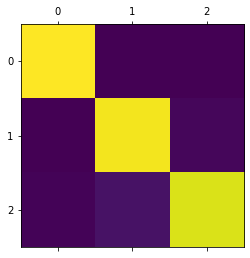

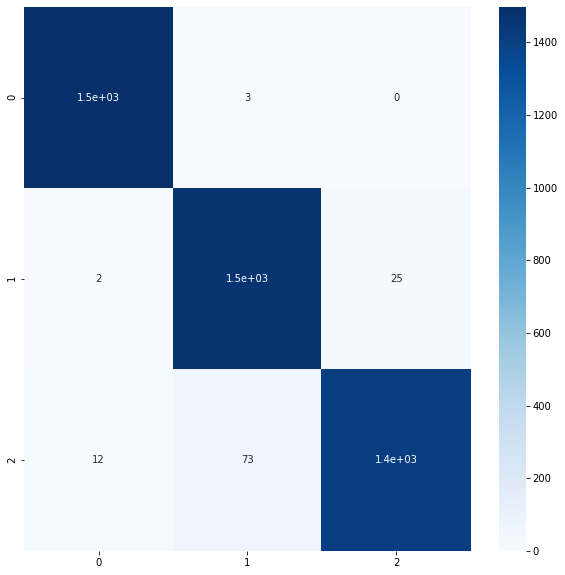

In [0]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

num_of_test_samples = 4500
batch_size = 64

Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes

print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)

plt.matshow(cm)


df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True,cmap="Blues")   # use vmin, vmax for changing color scale range
plt.savefig('confusion_matrix.png')